In [ ]:
# Importing the dataset from keras
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Checking the ‘type’
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<Figure size 432x288 with 0 Axes>

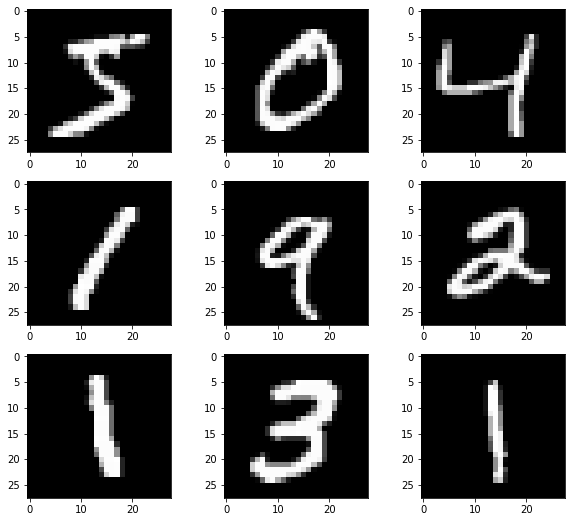

In [ ]:
import matplotlib.pyplot as plt
plt.gray() # B/W Images
plt.figure(figsize = (10,9)) # Adjusting figure size
# Displaying a grid of 3x3 images
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i])

In [ ]:
# Printing examples in 'y_train'
for i in range(5):
  print(y_train[i])

5
0
4
1
9


In [ ]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0
255


In [ ]:
#Reshaping input data
X_train = x_train.reshape(len(x_train),-1)
X_test = x_test.reshape(len(x_test),-1)

In [ ]:
#Checking the shape
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
import numpy as np

In [ ]:
# Data Normalization
# Conversion to float

x_train = x_train.astype(np.float32) 
x_test = x_test.astype(np.float32)
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# Checking the minimum and maximum values of x_train
print(x_train.min())
print(x_train.max())

0.0
1.0


In [ ]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

In [ ]:
kmeans.labels_


array([2, 7, 3, ..., 4, 8, 4], dtype=int32)

In [ ]:
def retrieve_info(cluster_labels,y_train):
# ‘’’
# Associates most probable label with each cluster in KMeans model
# returns: dictionary of clusters assigned to each label
# ‘’’
# Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [ ]:
reference_labels = retrieve_info(kmeans.labels_,y_train)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [ ]:
# Comparing Predicted values and Actual values
print(number_labels[:20].astype(np.int))
print(y_train[:20])

[3 0 4 1 7 2 1 3 1 8 3 1 3 6 1 7 2 8 6 8]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# Calculating accuracy score
from sklearn.metrics import accuracy_score
print(accuracy_score(number_labels,y_train))

0.5582


Task 1: Run the above code by solving all issues

Task 2: Optimize the code to improve the accuracy using given tutorial

Task 3: Try to run the code by using differnet dataset(Other than digits)

Task2:

In [ ]:
#Function to calculate metrics for the model
def calculate_metrics(model,output):
 print('Number of clusters is {}'.format(model.n_clusters))
 print('Inertia : {}'.format(model.inertia_))
 print('Homogeneity :       {}'.format(metrics.homogeneity_score(output,model.labels_)))

In [ ]:
from sklearn import metrics
import numpy as np
cluster_number = [10,16,36,64,144,256]
for i in cluster_number:
  total_clusters = len(np.unique(y_test))
  # Initialize the K-Means model
  kmeans = MiniBatchKMeans(n_clusters = i)
  # Fitting the model to training set
  kmeans.fit(X_train)
  # Calculating the metrics
  calculate_metrics(kmeans,y_train)
  # Calculating reference_labels
  reference_labels = retrieve_info(kmeans.labels_,y_train)
  # ‘number_labels’ is a list which denotes the number displayed in image
  number_labels = np.random.rand(len(kmeans.labels_))
  for i in range(len(kmeans.labels_)):
  
    number_labels[i] = reference_labels[kmeans.labels_[i]]
 
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))
#print('\n')

Number of clusters is 10
Inertia : 154285666409.45438
Homogeneity :       0.44416491851268874
Number of clusters is 16
Inertia : 144217939847.60553
Homogeneity :       0.5606879083333287
Number of clusters is 36
Inertia : 126985964536.98723
Homogeneity :       0.6858240113842272
Number of clusters is 64
Inertia : 117290230351.80026
Homogeneity :       0.7433019242000771
Number of clusters is 144
Inertia : 105436783874.69864
Homogeneity :       0.8063961587936335
Number of clusters is 256
Inertia : 97915803655.48016
Homogeneity :       0.8450491008023245
Accuracy score : 0.8997833333333334


In [ ]:
# Testing model on Testing set
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = 256)
# Fitting the model to testing set
kmeans.fit(X_test)
# Calculating the metrics
calculate_metrics(kmeans,y_test)
# Calculating the reference_labels
reference_labels = retrieve_info(kmeans.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
 
  number_labels[i] = reference_labels[kmeans.labels_[i]]
 
print('Accuracy_score : {}'.format(accuracy_score(number_labels,y_test)))
print('\n')

Number of clusters is 256
Inertia : 15595332633.046719
Homogeneity :       0.8653333962105015
Accuracy_score : 0.9016




In [ ]:
# Cluster centroids is stored in 'centroids'
centroids = kmeans.cluster_centers_

In [ ]:
centroids.shape

(256, 784)

In [ ]:
centroids = centroids.reshape(256,28,28)

In [ ]:
centroids = centroids * 255

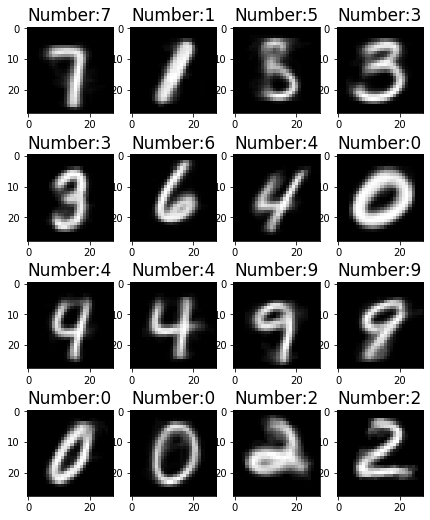

In [ ]:
plt.figure(figsize = (10,9))
bottom = 0.35
for i in range(16):
 plt.subplots_adjust(bottom)
 plt.subplot(4,4,i+1)
 plt.title('Number:{}'.format(reference_labels[i]),fontsize = 17)
 plt.imshow(centroids[i])

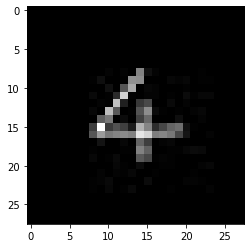

In [ ]:
# Reading the image
image = plt.imread('/content/sample_data/number_4.jpg')
plt.imshow(image)

In [ ]:
image.shape

(28, 28)

In [ ]:
# RGB image is converted to Monochrome image
from skimage import color
from skimage import io
image = color.rgb2gray(io.imread('/content/sample_data/number_4.jpg'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  after removing the cwd from sys.path.


In [69]:
# Reshaping into a row vector
image = image.reshape(1,28*28)

In [ ]:
image.shape

(1, 784)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
# Initialize the K-Means model

kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set

kmeans.fit(X_train)

# Calculating the reference_labels

reference_labels = retrieve_info(kmeans.labels_,y_train)

# 'number_labels' is a list which denotes the number displayed in image

number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
     
  number_labels[i] = reference_labels[kmeans.labels_[i]]


In [ ]:
# The cluster into which the image is classified into is predicted.

predicted_cluster = kmeans.predict(image)

In [ ]:
# The number in the image is predicted.

number_labels[[predicted_cluster]]

array([4.])

Task 3:


In [ ]:
#Using imge classification on a DOG image

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

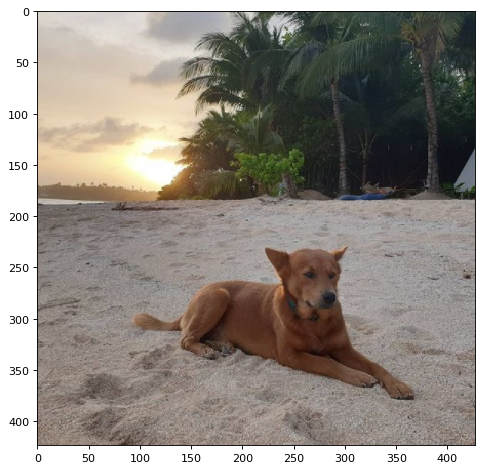

In [76]:
dog = imread('/content/sample_data/dog_on_beach.png')
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(dog);

In [78]:
def image_to_pandas(image):
    df = pd.DataFrame([image[:,:,0].flatten(),
                       image[:,:,1].flatten(),
                       image[:,:,2].flatten()]).T
    df.columns = ['Red_Channel','Green_Channel','Blue_Channel']
    return df
df_doggo = image_to_pandas(dog)
df_doggo.head(5)

,Red_Channel,Green_Channel,Blue_Channel
0,-41,-45,-53
1,-40,-44,-53
2,-39,-43,-52
3,-39,-43,-52
4,-39,-43,-52


/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


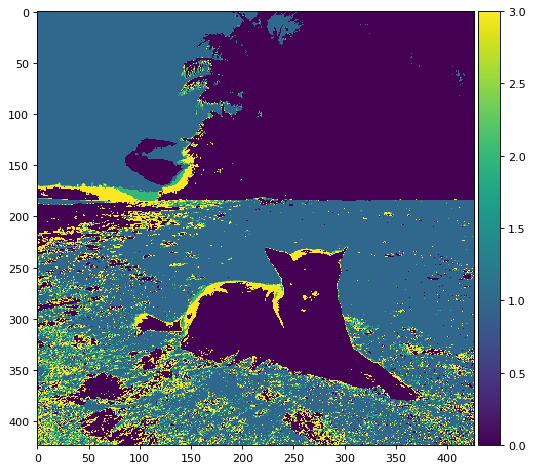

In [79]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters=  4, random_state = 42).fit(df_doggo)
result = kmeans.labels_.reshape(dog.shape[0],dog.shape[1])
imshow(result, cmap='viridis')
plt.show()

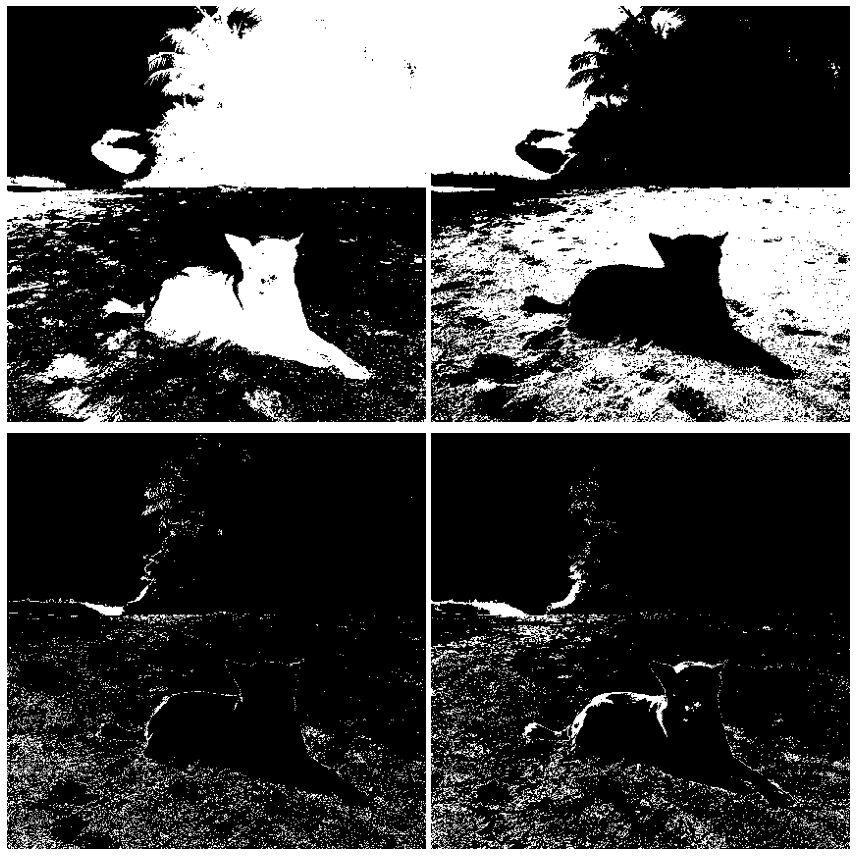

In [80]:
fig, axes = plt.subplots(2,2, figsize=(12, 12))
for n, ax in enumerate(axes.flatten()):
    ax.imshow(result==[n], cmap='gray');
    ax.set_axis_off()
    
fig.tight_layout()

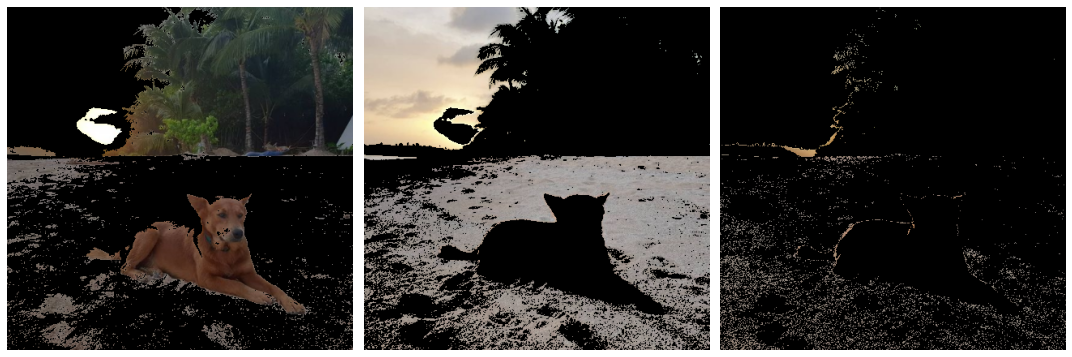

In [84]:
fig, axes = plt.subplots(1,3, figsize=(15, 12))
for n, ax in enumerate(axes.flatten()):
    dog = imread('/content/sample_data/dog_on_beach.png')
    dog[:, :, 0] = dog[:, :, 0]*(result==[n])
    dog[:, :, 1] = dog[:, :, 1]*(result==[n])
    dog[:, :, 2] = dog[:, :, 2]*(result==[n])
    ax.imshow(dog);
    ax.set_axis_off()
fig.tight_layout()

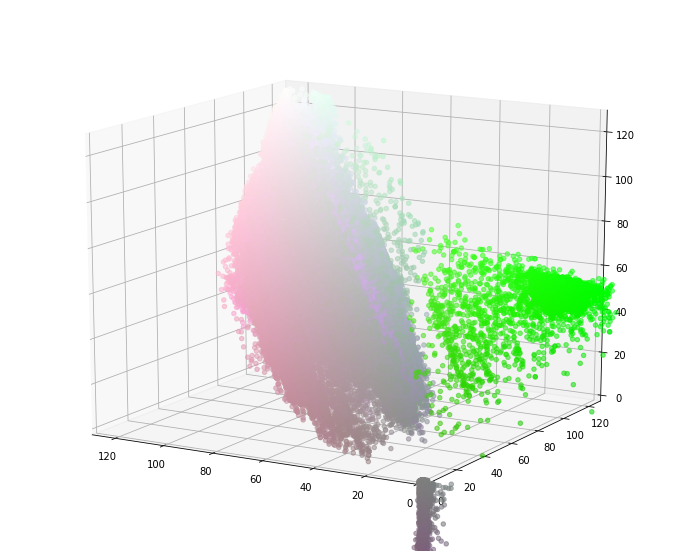

In [85]:
def pixel_plotter(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    color_list = list(zip(df['Red_Channel'].to_list(),
                          df['Blue_Channel'].to_list(),
                          df['Green_Channel'].to_list()))
    norm = colors.Normalize(vmin=0,vmax=1.)
    norm.autoscale(color_list)
    p_color = norm(color_list).tolist()
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, 
                    c = p_color, alpha = 0.55);
    
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    
    
    ax_3d.view_init(-165, 60)
pixel_plotter(df_doggo)

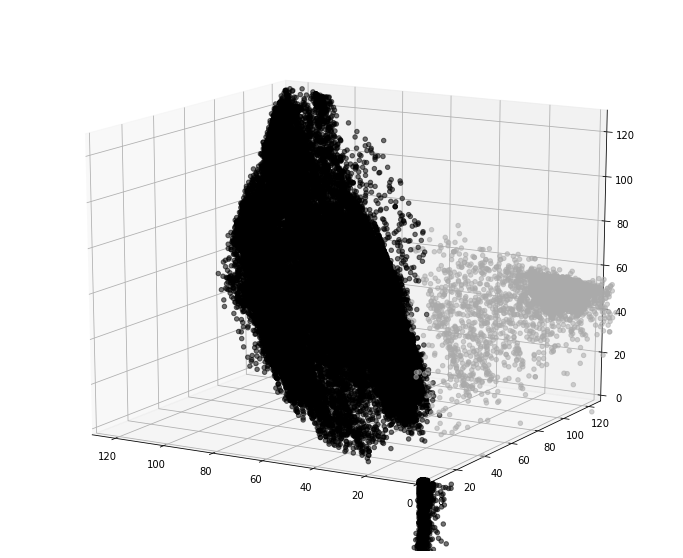

In [86]:
df_doggo['cluster'] = result.flatten()
def pixel_plotter_clusters(df):
    x_3d = df['Red_Channel']
    y_3d = df['Green_Channel']
    z_3d = df['Blue_Channel']
    
    fig = plt.figure(figsize=(12,10))
    ax_3d = plt.axes(projection='3d')
    ax_3d.scatter3D(xs = x_3d, ys =  y_3d, zs = z_3d, 
                    c = df['cluster'], alpha = 0.55);
    
    ax_3d.set_xlim3d(0, x_3d.max())
    ax_3d.set_ylim3d(0, y_3d.max())
    ax_3d.set_zlim3d(0, z_3d.max())
    ax_3d.invert_zaxis()
    
    
    ax_3d.view_init(-165, 60)
pixel_plotter_clusters(df_doggo)